# **Previsões de séries temporais com keras - deep learing**

`Bibliotecas iniciais`

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## **Aula 1: Pré-processamento**

In [2]:
# importando dados

df_passageiros = pd.read_csv('Passageiros.csv')

In [3]:
df_passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
# Setando parametros para os gráficos
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

<Axes: xlabel='tempo', ylabel='passageiros'>

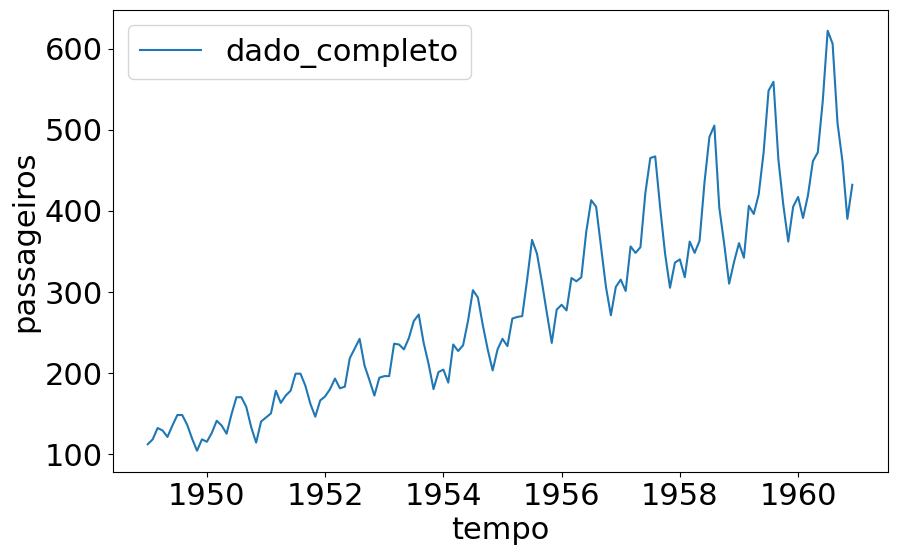

In [5]:
# Vizualizando a série temporal
sns.lineplot(x = 'tempo', y = 'passageiros', data = df_passageiros, label = 'dado_completo')

### **Escalando os dados**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
sc.fit(df_passageiros)

StandardScaler()

In [9]:
dados_norma = sc.transform(df_passageiros)

In [10]:
dados_norma

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593],
       [-1.59977995, -1.21538918],
       [-1.5757231 , -1.10664719],
       [-1.55166626, -1.10664719],
       [-1.52760942, -1.20702441],
       [-1.50355258, -1.34922546],
       [-1.47949574, -1.47469699],
       [-1.4554389 , -1.35759023],
       [-1.43138206, -1.38268454],
       [-1.40732522, -1.29067209],
       [-1.38326837, -1.16520057],
       [-1.35921153, -1.21538918],
       [-1.33515469, -1.29903686],
       [-1.31109785, -1.09828242],
       [-1.28704101, -0.9226223 ],
       [-1.26298417, -0.9226223 ],
       [-1.23892733, -1.02299951],
       [-1.21487049, -1.23211871],
       [-1.19081364, -1.3910493 ],
       [-1.1667568 , -1.17356534],
       [-1.14269996, -1.1317415 ],
       [-1.11864312, -1.08991766],
       [-1.09458628, -0.85570415],
       [-1.07052944, -0.98117567],
       [-1.0464726 ,

In [11]:
x = dados_norma[:,0]
y = dados_norma[:,1]

Text(0.5, 0, 'Data')

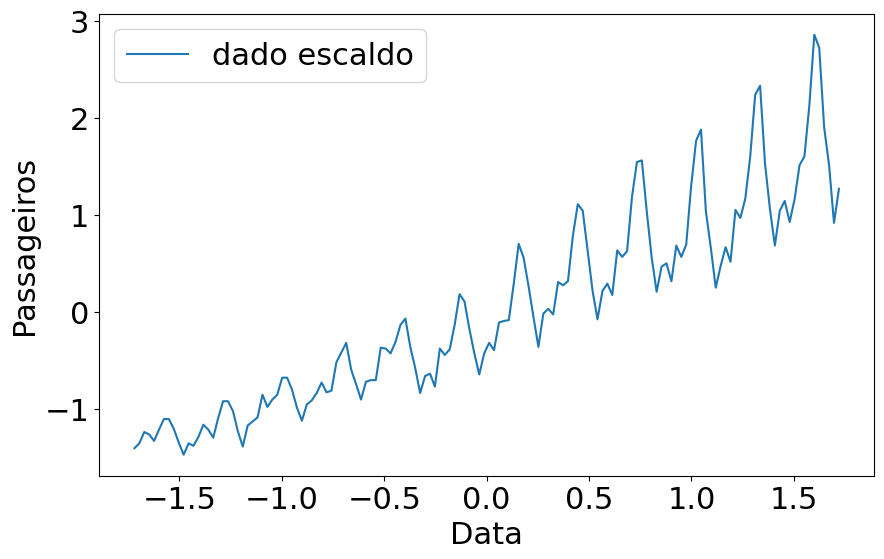

In [12]:
sns.lineplot(x = x, y = y, label = 'dado escaldo')
plt.ylabel('Passageiros')
plt.xlabel('Data')

### **Dividindo em treino e teste**

In [13]:
tamanho_treino = int(len(df_passageiros)*0.9)
tamanho_teste = len(df_passageiros)-tamanho_treino

In [14]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [15]:
xteste = x[tamanho_treino:len(df_passageiros)]
yteste = y[tamanho_treino:len(df_passageiros)]

<Axes: >

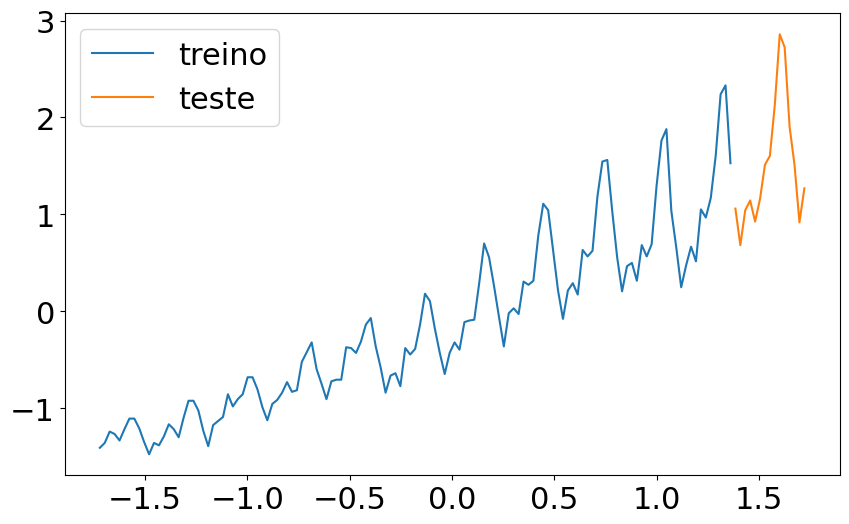

In [16]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

## **Aula 2: Regressão**

### **Regressão Linear**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-01-21 15:30:07.015979: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 15:30:07.016531: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 15:30:07.019126: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 15:30:07.029154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-21 15:30:07.047809: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [18]:
# Iniciando Modelo
regressor = Sequential()

regressor.add(Dense(1, input_dim = 1, kernel_initializer='Ones', activation= 'linear', use_bias = False))

regressor.compile(loss='mean_squared_error', optimizer = 'adam')

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Verificando Modelo
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Treinando e realizando predict

regressor.fit(xtreino,ytreino)
y_predict = regressor.predict(xtreino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1304  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: >

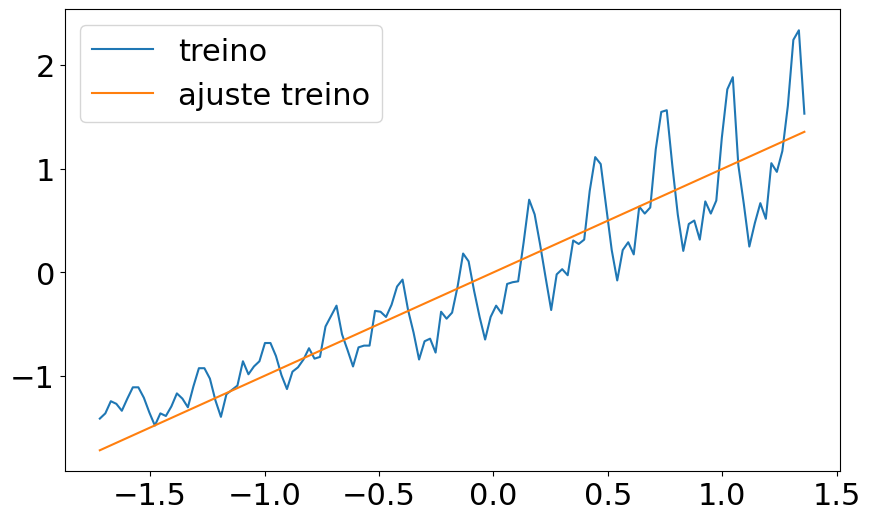

In [21]:
sns.lineplot(x = xtreino,y = ytreino,label = 'treino') 
sns.lineplot(x = xtreino,y = y_predict[:,0],label = 'ajuste treino') 

### **Mudando escala**

In [22]:
d = {'tempo': xtreino,
     'passageiros': y_predict[:,0]}

resultados = pd.DataFrame(data = d)

In [23]:
resultados.head(3)

,tempo,passageiros
0,-1.720064,-1.712909
1,-1.696007,-1.688953
2,-1.671950,-1.664996


In [24]:
def inverter_df(x):
     df_transform = sc.inverse_transform(x)
     df_transform = pd.DataFrame(df_transform)
     df_transform.columns = ['tempo', 'passageiros']
     return df_transform

In [25]:
resultado_transf = inverter_df(resultados)
resultado_transf

,tempo,passageiros
0,1949.000000,75.521927
1,1949.083333,78.385936
2,1949.166667,81.249946
3,1949.250000,84.113956
4,1949.333333,86.977979
...,...,...
124,1959.333333,430.659113
125,1959.416667,433.523123
126,1959.500000,436.387133
127,1959.583333,439.251128


<Axes: xlabel='tempo', ylabel='passageiros'>

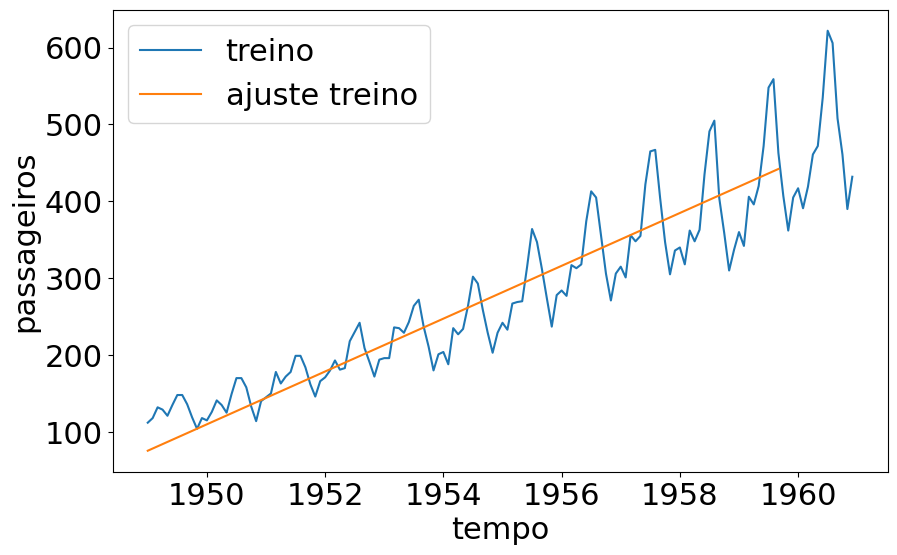

In [26]:
sns.lineplot(x = 'tempo',y = 'passageiros',
             data = df_passageiros , label = 'treino') 
sns.lineplot(x = 'tempo',y = 'passageiros',
             data = resultado_transf , label = 'ajuste treino') 

In [27]:
# Prevendo o conjunto de teste
y_predict_test = regressor.predict(xteste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [28]:
y_predict_test

array([[1.3775146],
       [1.4014714],
       [1.4254282],
       [1.4493848],
       [1.4733417],
       [1.4972985],
       [1.5212553],
       [1.545212 ],
       [1.5691687],
       [1.5931256],
       [1.6170822],
       [1.6410391],
       [1.6649959],
       [1.6889527],
       [1.7129095]], dtype=float32)

In [29]:
d = {'tempo': xteste,
     'passageiros': y_predict_test[:,0]}

resultados_test = pd.DataFrame(data = d)

In [30]:
resultado_transf_test = inverter_df(resultados_test)

In [31]:
resultado_transf_test.head()

,tempo,passageiros
0,1959.750000,444.979161
1,1959.833333,447.843171
2,1959.916667,450.707180
3,1960.000000,453.571176
4,1960.083333,456.435200


<Axes: xlabel='tempo', ylabel='passageiros'>

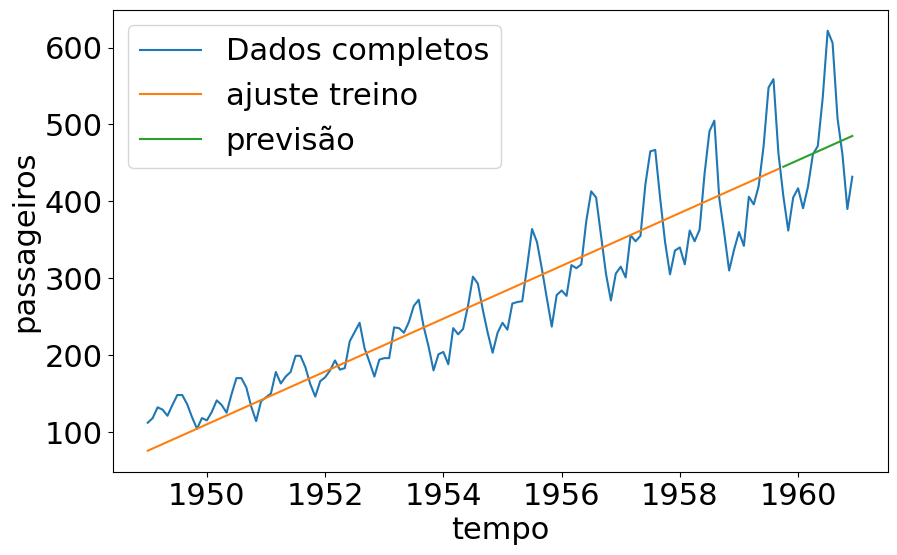

In [32]:
sns.lineplot(x = 'tempo',y = 'passageiros',
             data = df_passageiros , label = 'Dados completos') 
sns.lineplot(x = 'tempo',y = 'passageiros',
             data = resultado_transf , label = 'ajuste treino') 
sns.lineplot(x = 'tempo',y = 'passageiros',
             data = resultado_transf_test , label = 'previsão') 

#### **Adicionando mais camadas** 

In [33]:
# Iniciando Modelo
regressor2 = Sequential()

regressor2.add(Dense(8, input_dim = 1, kernel_initializer='random_uniform', 
                     activation= 'sigmoid', use_bias = False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation= 'sigmoid', use_bias = False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation= 'linear', use_bias = False))

regressor2.compile(loss='mean_squared_error', optimizer = 'adam')

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Checando a rede
regressor2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
regressor2.fit(xtreino, ytreino, epochs=500, verbose=0)

In [36]:
y_predict = regressor2.predict(xtreino)
y_predict_test = regressor2.predict(xteste)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [37]:
y_predict[0:5]

array([[-1.1022803],
       [-1.100289 ],
       [-1.0982031],
       [-1.0960176],
       [-1.0937276]], dtype=float32)

<Axes: >

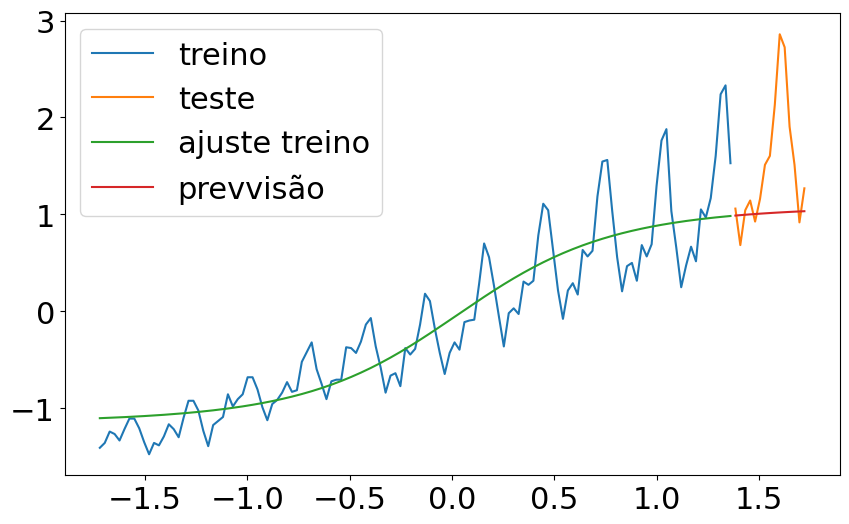

In [38]:
sns.lineplot(x = xtreino,y = ytreino,label = 'treino')
sns.lineplot(x = xteste,y = yteste,label = 'teste')
sns.lineplot(x = xtreino,y = y_predict[:,0],label = 'ajuste treino')
sns.lineplot(x = xteste,y = y_predict_test[:,0],label = 'prevvisão')

## **Aula 3: Reformulando o problema**

### **Alterando a forma como os dados são passados**

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [39]:
vetor = pd.DataFrame(ytreino)[0]

In [40]:
def separa_dados(vetor, n_passos):
     X_novo, y_novo = [], []
     
     for i in range(n_passos, vetor.shape[0]):
          X_novo.append(list(vetor.loc[i-n_passos:i-1]))
          y_novo.append(vetor.loc[i])
     X_novo, y_novo = np.array(X_novo), np.array(y_novo)
     return X_novo, y_novo

In [41]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [42]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [43]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [44]:
xtreino_novo.shape, ytreino_novo.shape

((128, 1), (128,))

#### **Dividindo conjutno Treino e Teste**

In [45]:
vetor2 = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor2, 1)


In [46]:
xteste_novo.shape, yteste_novo.shape

((14, 1), (14,))

### **Voltando para as redes neurais**

In [47]:
regressor3 = Sequential()

regressor3.add(Dense(8, input_dim = 1, kernel_initializer = 'ones',
                     activation = 'linear', use_bias = False)),

regressor3.add(Dense(64, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = False)),

regressor3.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')
regressor3.summary()

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584 (2.28 KB)

 Trainable params: 584 (2.28 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
regressor3.fit(xtreino_novo,ytreino_novo, epochs = 100, verbose=0)

In [49]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: xlabel='tempo', ylabel='0'>

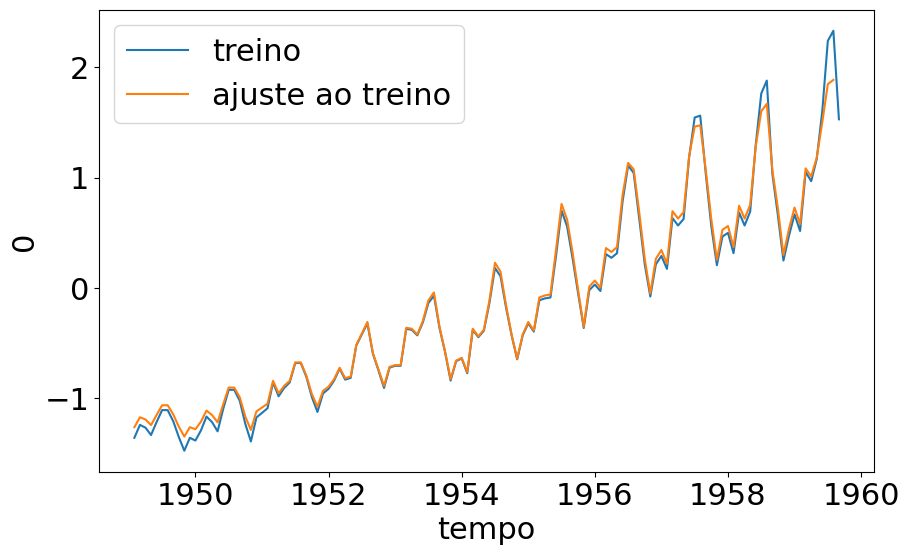

In [50]:
sns.lineplot(x = 'tempo', y = ytreino_novo, data=df_passageiros[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = df_passageiros[1:129], label = 'ajuste ao treino')

In [51]:
y_predict_test_novo = regressor3.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_test_novo)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


<Axes: xlabel='tempo', ylabel='0'>

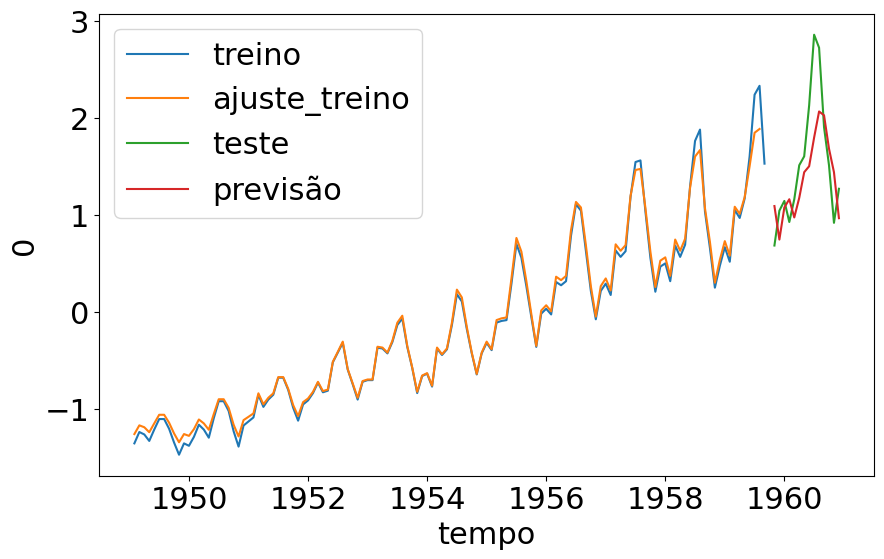

In [52]:
sns.lineplot(x='tempo',y=ytreino_novo,data=df_passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=df_passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=df_passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=df_passageiros[130:144],label='previsão')

In [53]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [54]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [55]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [56]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [57]:
regressor4 = Sequential()

In [58]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 608 (2.38 KB)

 Trainable params: 608 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300, verbose = 0)

In [60]:
y_predict_teste_novo = regressor4.predict(xteste_novo)
resultado = pd.DataFrame(y_predict_teste_novo)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


<Axes: xlabel='tempo', ylabel='0'>

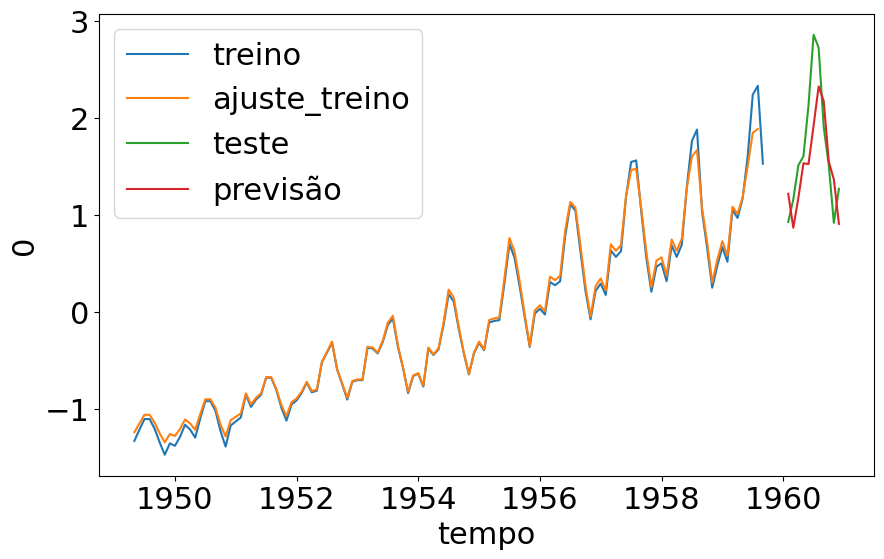

In [61]:
sns.lineplot(x='tempo',y=ytreino_novo,data=df_passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=df_passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=df_passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=df_passageiros[133:144],label='previsão')

## **Aula 4: Redes Recorrentes**

In [62]:
bikes = pd.read_csv('bicicletas.csv')

In [63]:
bikes['datas'] = pd.to_datetime(bikes['datas'])


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

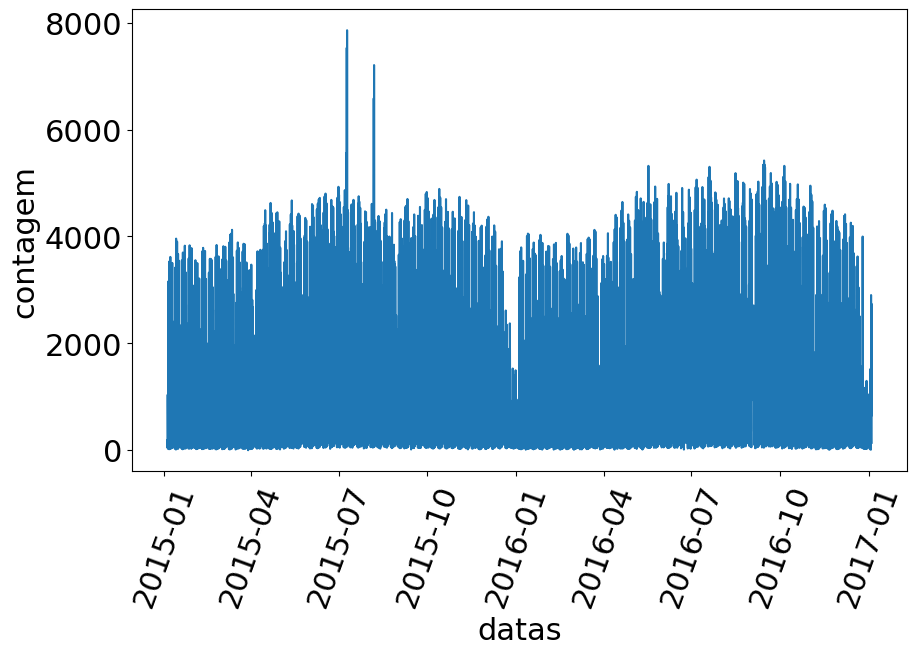

In [64]:
sns.lineplot(x = 'datas', y = 'contagem', data = bikes)
plt.xticks(rotation = 70)

### **Escalando os dados**

In [65]:
sc2 = StandardScaler()

In [66]:
sc2.fit(bikes['contagem'].values.reshape(-1,1))

StandardScaler()

In [67]:
y = sc2.transform(bikes['contagem'].values.reshape(-1,1))

#### **Dividindo conjutno Treino e Teste**

In [68]:
tamanho_treino = int(len(bikes)*0.9)
tamanho_teste = len(bikes) - tamanho_treino

In [69]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bikes)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

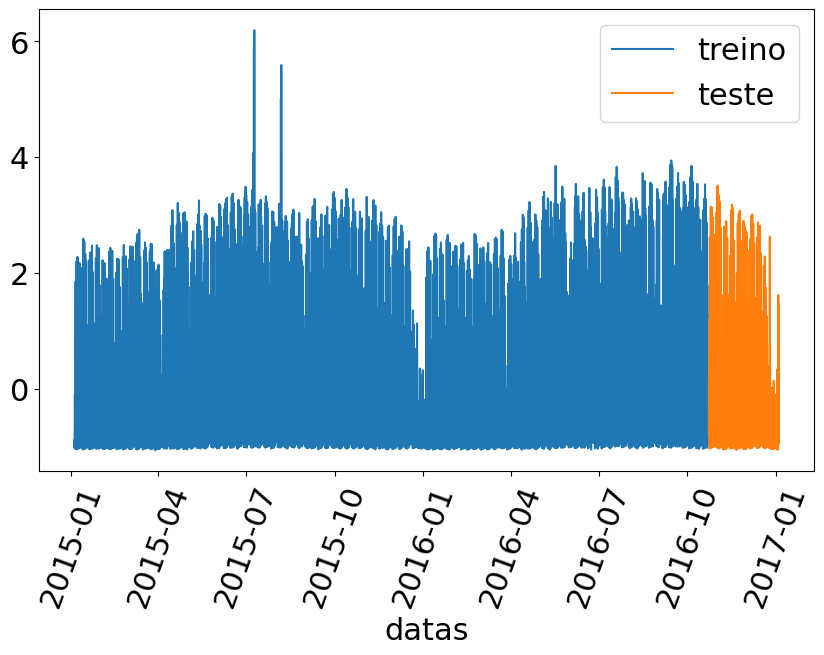

In [70]:
sns.lineplot(x = 'datas', y = ytreino[:,0], data = bikes[0:tamanho_treino], label = 'treino')
sns.lineplot(x = 'datas', y = yteste[:,0], data = bikes[tamanho_treino:len(bikes)], label =  'teste')
plt.xticks(rotation = 70)

In [71]:
vetor = pd.DataFrame(ytreino)[0]
vetor[:5]

0   -0.885745
1   -0.926295
2   -0.929982
3   -0.987120
4   -1.010160
Name: 0, dtype: float64

In [72]:
xtreino_novo , ytreino_novo = separa_dados(vetor, 10)
xtreino_novo[:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [73]:
vetor2 = pd.DataFrame(yteste)[0]

In [74]:
xteste_novo , yteste_novo = separa_dados(vetor2, 10)

### O que esperar de um LSTM:

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [75]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1], 1))
xtreino_novo.shape


(15662, 10, 1)

In [76]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1], 1))
xteste_novo.shape

(1732, 10, 1)

### **Usando LSTM**

In [77]:
from tensorflow.keras.layers import LSTM

In [78]:
recorrente = Sequential()


In [79]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)


Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0187 - val_loss: 0.0140
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0165 - val_loss: 0.0152
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0169 - val_loss: 0.0174
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0186 - val_loss: 0.0143
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0177 - val_loss: 0.0149
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0169 - val_loss: 0.0180
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0178 - val_loss: 0.0154
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0171 - val_loss: 0.0150
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0188 - val_loss: 0.0148
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0170 - val_loss: 0.0154
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━

In [277]:
y_ajustado = recorrente.predict(xtreino_novo, verbose = 0)


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

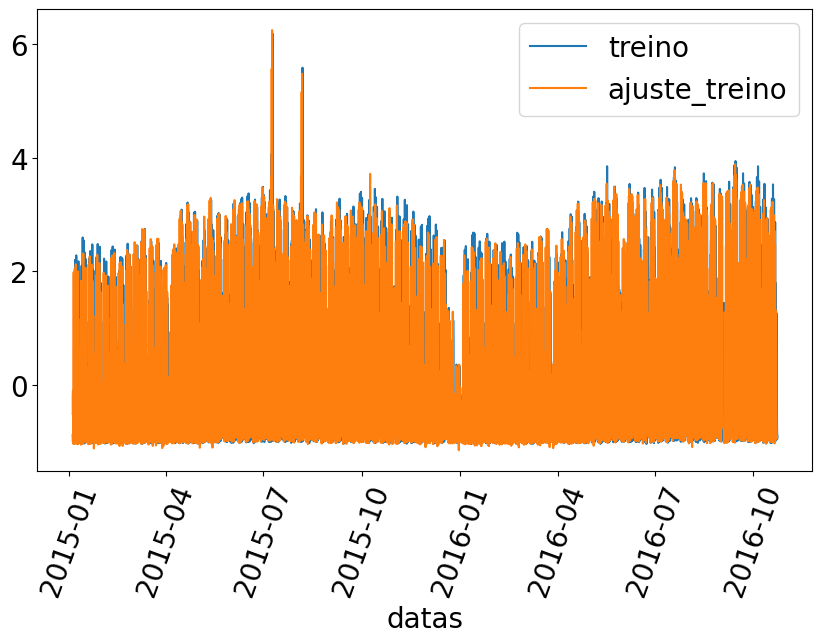

In [278]:
sns.lineplot(x = 'datas',y = ytreino[:,0], data = bikes[0:tamanho_treino],label = 'treino')
sns.lineplot(x = 'datas',y = y_ajustado[:,0], data = bikes[0:15662],label = 'ajuste_treino')
plt.xticks(rotation = 70) 

In [279]:
y_pred = recorrente.predict(xteste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [280]:
len(y_pred)

1732

In [281]:
bikes[tamanho_treino+10:len(bikes)].shape

(1732, 10)

In [282]:
bikes.shape

(17414, 10)

(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

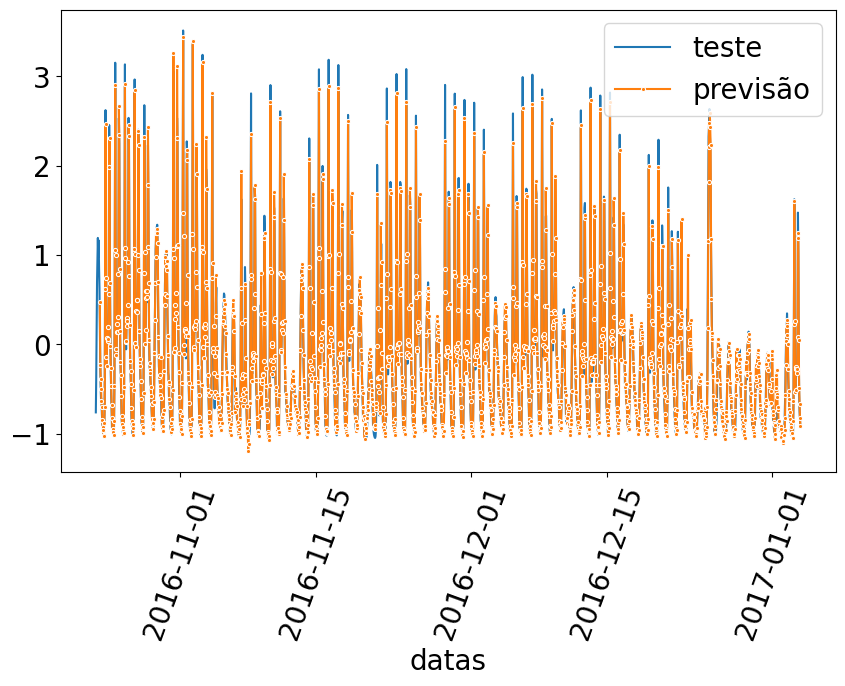

In [283]:
sns.lineplot(x = 'datas',y = yteste[:,0], data = bikes[tamanho_treino:len(bikes)],label = 'teste')
sns.lineplot(x = 'datas',y = y_pred[:,0], data = bikes[tamanho_treino+10:len(bikes)],marker = '.',label = 'previsão')

plt.xticks(rotation = 70)

### **Usando o GRU**

In [284]:
from tensorflow.keras.layers import GRU

In [285]:
recorrente_g = Sequential()

recorrente_g.add(GRU(128, input_shape = (xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

/home/ike/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [286]:
recorrente_g.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [287]:
recorrente_g.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [288]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo,
                              validation_data=(xtest_novo, ytest_novo), epochs = 100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4276 - val_loss: 0.0621
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0726 - val_loss: 0.0392
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0549 - val_loss: 0.0274
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0430 - val_loss: 0.0241
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0398 - val_loss: 0.0232
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0412 - val_loss: 0.0228
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0344 - val_loss: 0.0271
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0317 - val_loss: 0.0210
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0314 - val_loss: 0.0211
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0350 - val_loss: 0.0196
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0340 - val_loss: 0.0208
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred2 = recorrente_g.predict(xtest_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

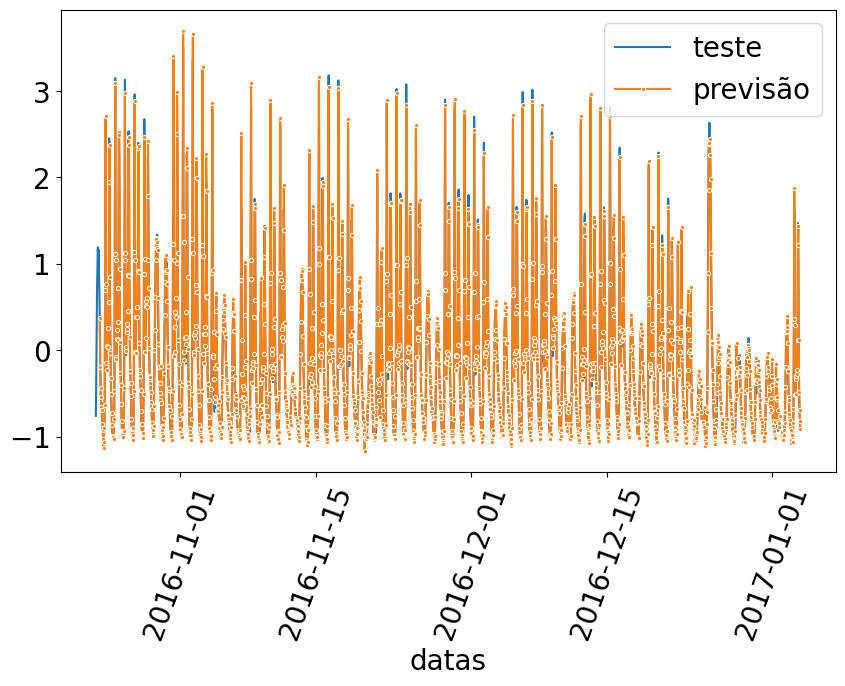

In [ ]:
sns.lineplot(x = 'datas',y = yteste[:,0], data = bikes[tamanho_treino:len(bikes)],label = 'teste')
sns.lineplot(x = 'datas',y = y_pred2[:,0], data = bikes[tamanho_treino+10:len(bikes)],marker = '.',label = 'previsão')
plt.xticks(rotation = 70)

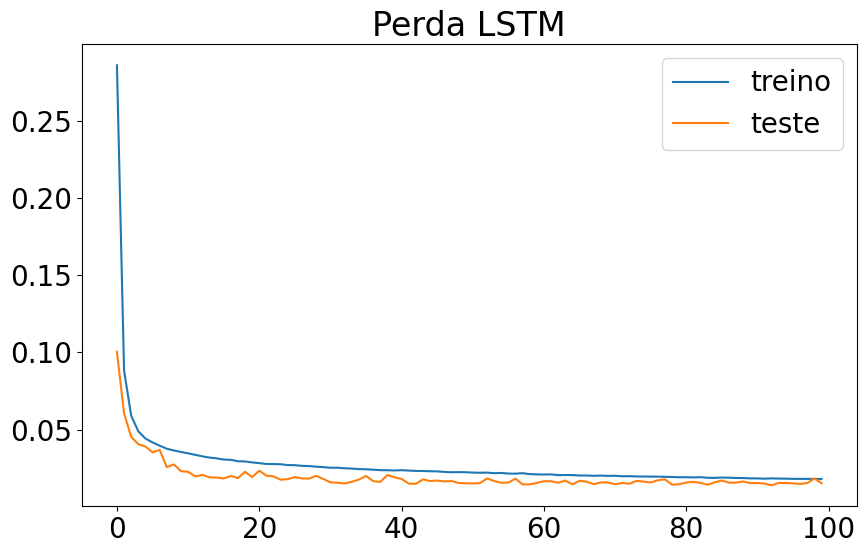

In [291]:
plt.title('Perda LSTM')
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino', 'teste'])

Text(0, 0.5, 'Custo')

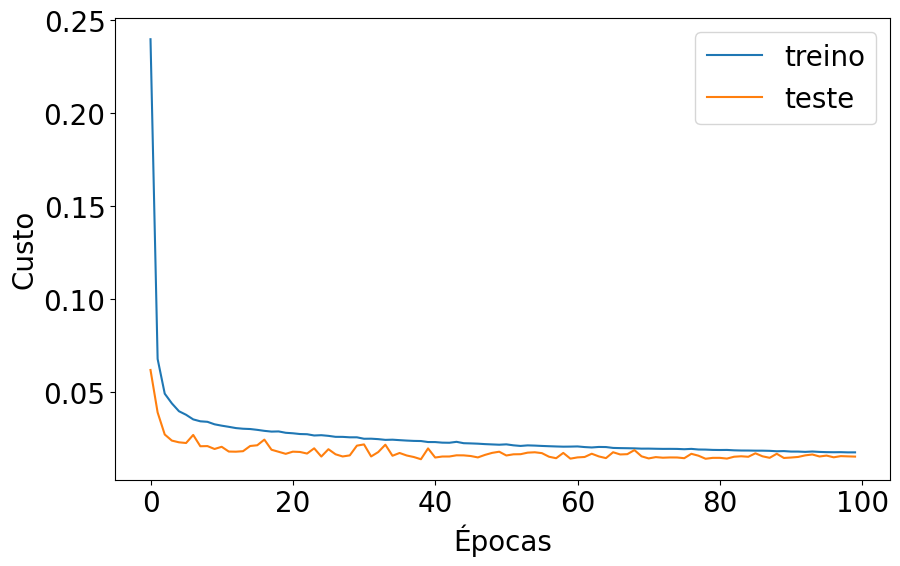

In [292]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')